In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [31]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [32]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8634 - loss: 0.4753 - val_accuracy: 0.9526 - val_loss: 0.1580
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9624 - loss: 0.1228 - val_accuracy: 0.9703 - val_loss: 0.1012
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9740 - loss: 0.0826 - val_accuracy: 0.9619 - val_loss: 0.1341
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9817 - loss: 0.0596 - val_accuracy: 0.9720 - val_loss: 0.0955
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9862 - loss: 0.0431 - val_accuracy: 0.9743 - val_loss: 0.0924
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9882 - loss: 0.0363 - val_accuracy: 0.9731 - val_loss: 0.0959
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9907 - loss: 0.0277 - val_accuracy: 0.9762 - val_loss: 0.0950
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9923 - loss: 0.0231 - 

In [34]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.1277
Test Accuracy: 0.9750000238418579


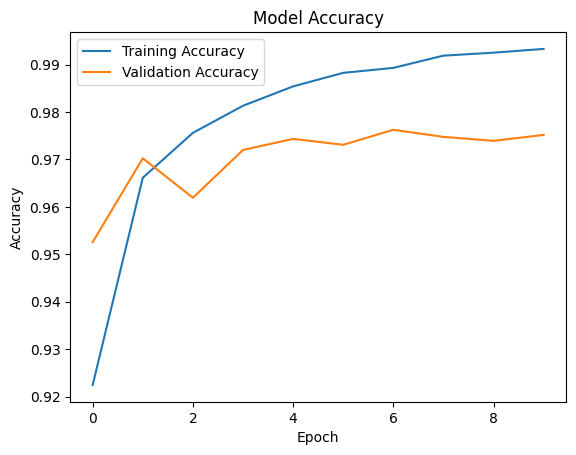

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


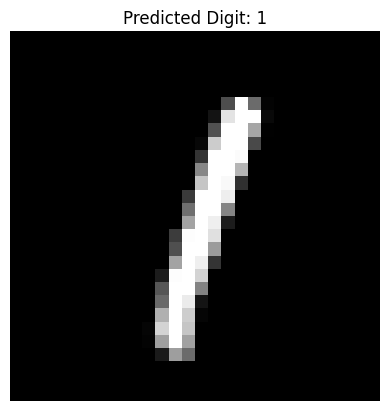

In [36]:
index = 5
prediction = model.predict(X_test[index].reshape(1, 28, 28))
predicted_label = np.argmax(prediction)

plt.imshow(X_test[index], cmap='gray')
plt.title(f"Predicted Digit: {predicted_label}")
plt.axis('off')
plt.show()